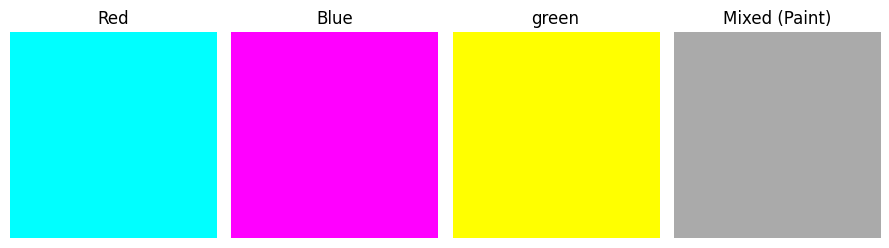

In [ ]:
import matplotlib.pyplot as plt

def rgb_to_cmy(rgb):
    r, g, b = [x / 255.0 for x in rgb]
    return [1 - r, 1 - g, 1 - b]

def cmy_to_rgb(cmy):
    c, m, y = cmy
    return [int(255 * (1 - c)), int(255 * (1 - m)), int(255 * (1 - y))]

def mix_paint_colors(rgb_colors):
    # RGB'den CMY'ye dönüştür
    cmy_colors = [rgb_to_cmy(rgb) for rgb in rgb_colors]
    # CMY'de ortalama
    mixed_cmy = [sum(c) / len(cmy_colors) for c in zip(*cmy_colors)]
    # RGB'ye geri çevir
    return cmy_to_rgb(mixed_cmy)

# 🎨 Örnek renkler: Kırmızı ve Mavi
red = [0,255,255]
blue = [255,0,255]
green = [255,255,0]

# Karışım işlemi
mixed = mix_paint_colors([red, blue, green])

# 🔍 Görselleştir
colors = [red, blue, green, mixed]
labels = ['Red', 'Blue', 'green', 'Mixed (Paint)']

fig, ax = plt.subplots(1, len(labels), figsize=(9, len(labels)))
for i in range(len(labels)):
    ax[i].imshow([[colors[i]]])
    ax[i].axis('off')
    ax[i].set_title(labels[i])

plt.tight_layout()
plt.show()


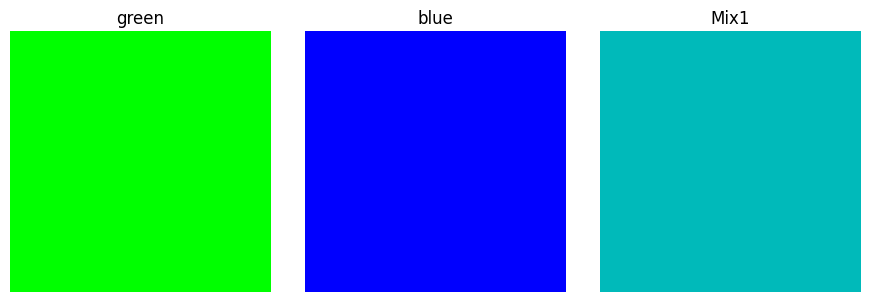

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# sRGB gamma düzeltmesiyle karışım
def blend_srgb_gamma(colors, gamma=2.2):
    def to_linear(c): return [(x / 255.0) ** gamma for x in c]
    def to_srgb(c): return [int((max(0, min(1, x))) ** (1 / gamma) * 255) for x in c]

    linear_colors = [to_linear(c) for c in colors]
    blended_linear = np.mean(linear_colors, axis=0)
    return to_srgb(blended_linear)

# Renkler
red = [255, 0, 0]
green = [0, 255, 0]
blue = [0, 0, 255]
mix1 = blend_srgb_gamma([green, blue])

colors = [green, blue, mix1]
labels = ['green', 'blue', 'Mix1']

# Görselleştirme
fig, ax = plt.subplots(1, len(labels), figsize=(9, 3))
for i in range(len(labels)):
    ax[i].imshow([[colors[i]]])
    ax[i].axis('off')
    ax[i].set_title(labels[i])

plt.tight_layout()
plt.show()
